In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moumitajana","key":"d534ab4cc6b9a1e679f8d3120f269670"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=42e194fb218ace1698be4b98b4dd8e5de196ee3fcb9662fa2be77eec8395e35b
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-30 11:37:00           8642        734  1.0              
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5275        417  0.9375           
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1850        148  1.0              
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job 

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

 83% 52.0M/62.6M [00:00<00:00, 44.2MB/s]
100% 62.6M/62.6M [00:00<00:00, 77.5MB/s]


In [ ]:
!unzip "/content/sign-language-mnist.zip" -d"/content"

Archive:  /content/sign-language-mnist.zip
  inflating: /content/amer_sign2.png  
  inflating: /content/amer_sign3.png  
  inflating: /content/american_sign_language.PNG  
  inflating: /content/sign_mnist_test.csv  
  inflating: /content/sign_mnist_test/sign_mnist_test.csv  
  inflating: /content/sign_mnist_train.csv  
  inflating: /content/sign_mnist_train/sign_mnist_train.csv  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df=pd.read_csv("/content/sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
test_df=pd.read_csv("/content/sign_mnist_test.csv")
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_df.shape

(27455, 785)

In [ ]:
test_df.shape

(7172, 785)

In [ ]:
train_df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

(-0.5, 664.5, 470.5, -0.5)

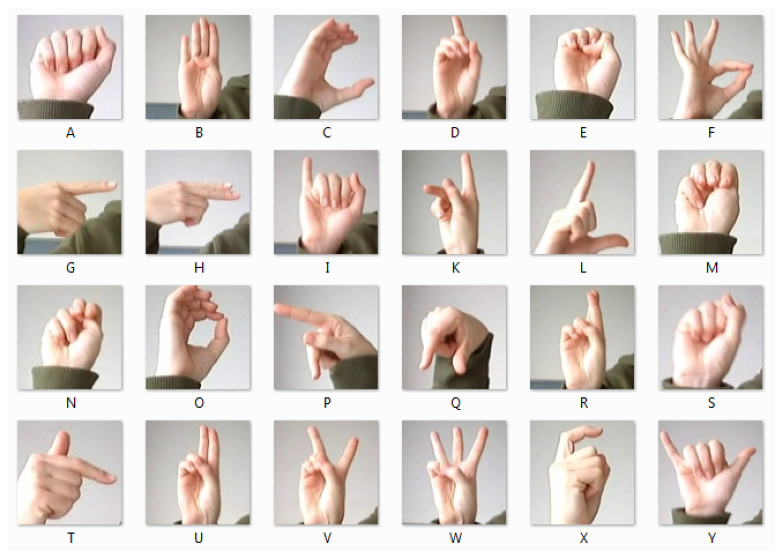

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize=(15,10))
plt.imshow(Image.open("/content/amer_sign2.png"))
plt.axis('off')

In [ ]:
list="ABCDEFGHIKLMNOPQRSTUVWXY"
pred_list=[]
for i in list:
  pred_list.append(i)
pred_list

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

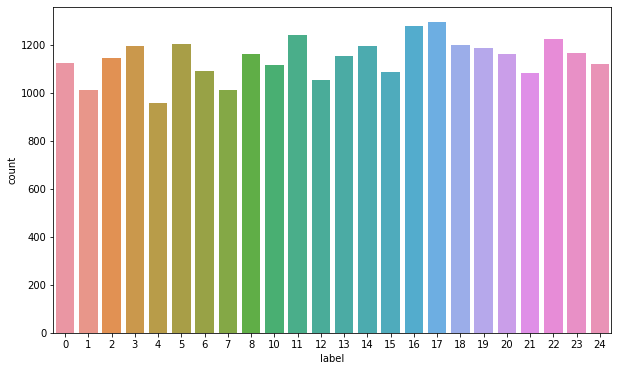

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=train_df,x='label')

here all unique point have values above 1000 

In [ ]:
y_train = train_df['label']
x_train = train_df.drop(columns=['label'])

y_test = test_df['label']
x_test = test_df.drop(columns=['label'])

print(x_train.shape,y_train.shape)

(27455, 784) (27455,)


In [ ]:
x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

print(x_train.shape,x_test.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Imgen

In [ ]:
traingen = Imgen(rescale = 1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 brightness_range=[0.85,1.20],
                 rotation_range=20,
                 validation_split=0.2
                )
testgen = Imgen(rescale = 1./255)

In [ ]:
train_ds = traingen.flow(x_train,y_train,
                        batch_size = 32,
                        subset='training'
                        )

val_ds = traingen.flow(x_train,y_train,
                        batch_size = 32,
                        subset='validation'
                        )

test_ds = testgen.flow(x_test,y_test,
                       batch_size = 32,
                       shuffle = False
                      )

In [ ]:
x,y = next(train_ds)

In [ ]:
def plot_images(images_arr,labels):
    plt.figure(figsize=(15,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images_arr[i])
        plt.title(pred_class[(labels[i])])
        plt.axis('off')

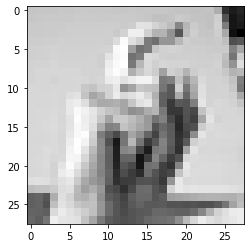

In [ ]:
def to_image(array, label = True):
    # Reshape an array into an image format
    array = np.array(array)
    start_idx = 1 if label else 0
    return array[start_idx:].reshape(28,28).astype(float)
        
# Display one image
img = to_image(train_df.iloc[27454])
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Conv2D,Dense,Flatten,Dropout,BatchNormalization 

In [ ]:
model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
                    MaxPool2D(2,2, padding='same'),
                    
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Flatten(),
                    
                    Dense(units=1024, activation="relu"),                 
                    Dense(units=256, activation="relu"),
                    Dropout(0.5),
                    Dense(units=25, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es1 = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
hist = model.fit(train_ds, epochs=15, validation_data=val_ds,callbacks=[es1])

Epoch 1/15
687/687 [==============================] - 110s 158ms/step - loss: 1.5386 - accuracy: 0.5055 - val_loss: 0.3496 - val_accuracy: 0.8791
Epoch 2/15
687/687 [==============================] - 108s 157ms/step - loss: 0.2377 - accuracy: 0.9182 - val_loss: 0.1084 - val_accuracy: 0.9656
Epoch 3/15
687/687 [==============================] - 108s 157ms/step - loss: 0.0987 - accuracy: 0.9685 - val_loss: 0.0262 - val_accuracy: 0.9924
Epoch 4/15
687/687 [==============================] - 109s 158ms/step - loss: 0.0554 - accuracy: 0.9825 - val_loss: 0.0519 - val_accuracy: 0.9800
Epoch 5/15
687/687 [==============================] - 108s 157ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoch 6/15
687/687 [==============================] - 109s 159ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 7/15
687/687 [==============================] - 108s 158ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0296 -

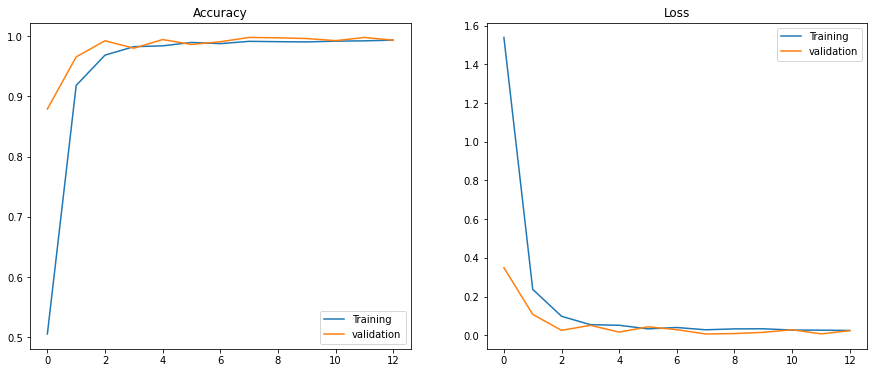

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label = 'Training')
plt.plot(hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label = 'Training')
plt.plot(hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
preds = model.predict(test_ds)

In [ ]:
preds = [np.argmax(i) for i in preds]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      0.99      1.00       435
           2       0.99      0.98      0.98       314
           3       0.92      1.00      0.96       225
           4       1.00      0.96      0.98       518
           5       1.00      0.88      0.94       280
           6       0.76      1.00      0.86       265
           7       0.90      0.95      0.92       415
           8       0.99      1.00      0.99       285
          10       1.00      0.98      0.99       337
          11       1.00      1.00      1.00       209
          12       0.95      0.98      0.96       380
          13       0.97      1.00      0.99       283
          14       0.91      1.00      0.96       225
          15       1.00      1.00      1.00       347
          16       1.00      0.96      0.98       171
          17       0.56      1.00      0.72        81
          18       1.00    

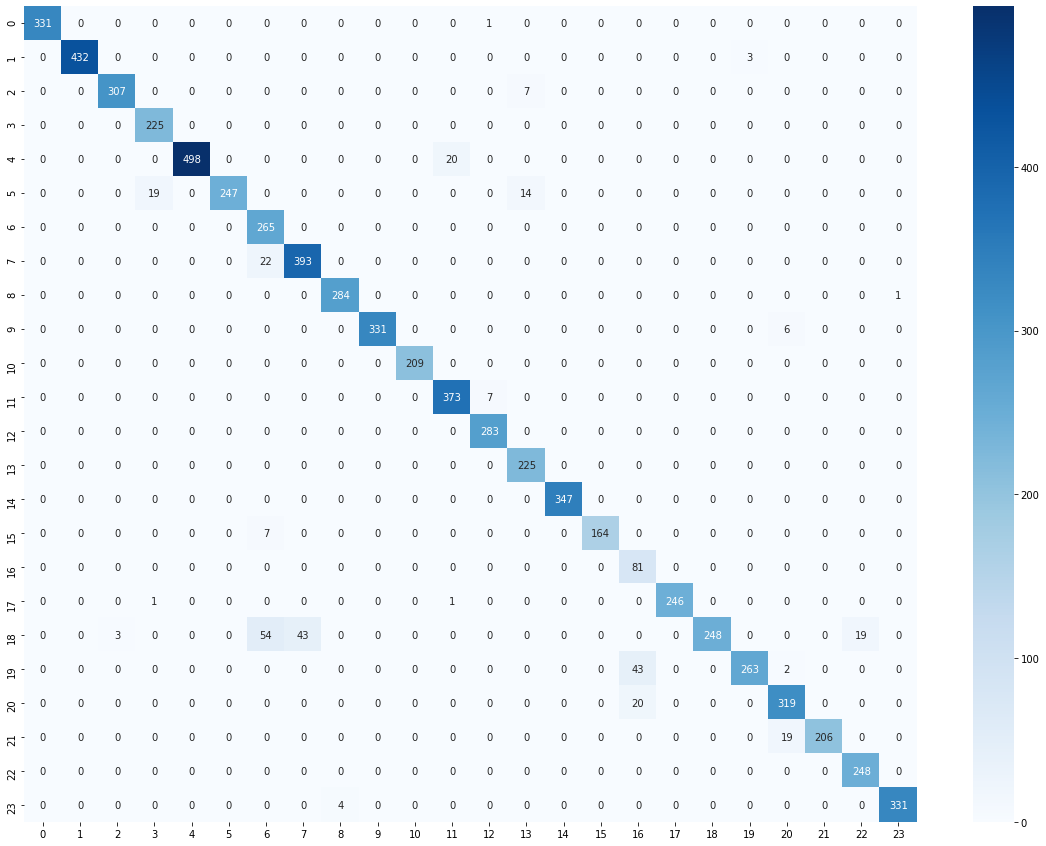

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(confusion_matrix(preds,y_test),fmt='d',annot=True,cmap='Blues')

In [ ]:
model.save_weights('first_try.h5')

In [ ]:
with open('model_architecture.json','w') as f:
    f.write(model.to_json())